In [1]:
import numpy as np
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys

import argparse, os, math, pickle, json

# 1) Load your model
from dual_alm_rnn_models import *
from dual_alm_rnn_models import TwoHemiRNNTanh_asymmetric_single_readout
from dual_alm_rnn_exp import DualALMRNNExp
plt.rcParams['pdf.fonttype'] = '42' 


## Small RNN cross hemi analysis

In [2]:
# 0.2 L, 1 R
lefthemi_learning_rightdom = np.load('test/figs/crosshemi/epoch_0/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
righthemi_learning_rightdom = np.load('test/figs/lr/all_learning_right_L0.2_R1.npy')

# 1 L, 0.2 R
lefthemi_learning_leftdom = np.load('test/figs/lr/all_learning_left_L1_R0.2.npy')
righthemi_learning_leftdom = np.load('test/figs/lr/all_learning_right_L1_R0.2.npy')


# 0.2 L, 1 R
learning_epoch0 = np.load('test/figs/crosshemi/epoch_0/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
learning_epoch10 = np.load('test/figs/crosshemi/epoch_10/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
learning_epoch20 = np.load('test/figs/crosshemi/epoch_20/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
learning_epoch40 = np.load('test/figs/crosshemi/epoch_40/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')

# # symmetric
# learning_epoch0 = np.load('test/figs/crosshemi/symmetric/epoch_0/all_learning_epoch.npy')
# learning_epoch10 = np.load('test/figs/crosshemi/symmetric/epoch_10/all_learning_epoch.npy')
# learning_epoch20 = np.load('test/figs/crosshemi/symmetric/epoch_20/all_learning_epoch.npy')
# learning_epoch40 = np.load('test/figs/crosshemi/symmetric/epoch_40/all_learning_epoch.npy')

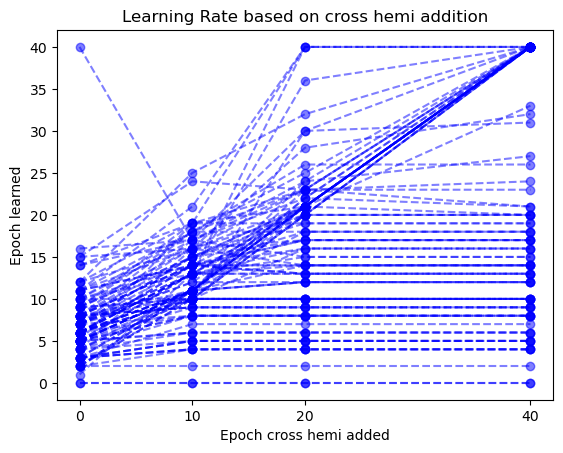

In [52]:
# how much does learning speed up with cross hemi?
for i in range(100):
    plt.plot([0,1,2,4],[learning_epoch0[i], learning_epoch10[i], learning_epoch20[i], learning_epoch40[i]], ls='--', marker='o',color='b',alpha=0.5)

plt.xticks([0, 1, 2, 4], ['0', '10', '20', '40'])
plt.xlabel('Epoch cross hemi added')
plt.ylabel('Epoch learned')
plt.title('Learning Rate based on cross hemi addition')
plt.show()



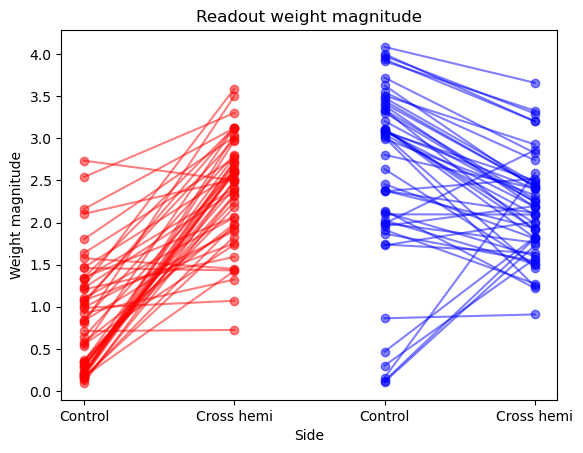

In [107]:
# readout weight imbalance washout

# 0.2 L, 1 R
readout_crosshemi = np.load('test/figs/crosshemi/epoch_0/left_asymm_0.2_right_asymm_1/all_readout_weights.npy')

readout_ctl = np.load('test/figs/crosshemi/epoch_40/left_asymm_0.2_right_asymm_1/all_readout_weights.npy')


for i in range(50,100):

    plt.plot([0,1],[np.sum(np.abs(readout_ctl[i,0,:2])), np.sum(np.abs(readout_crosshemi[i,0,:2]))], marker='o', color='red', alpha=0.5)
    plt.plot([2,3],[np.sum(np.abs(readout_ctl[i,0,2:])), np.sum(np.abs(readout_crosshemi[i,0,2:]))], marker='o', color='blue', alpha=0.5)


plt.xticks([0, 1 ,2 , 3], ['Control', 'Cross hemi', 'Control', 'Cross hemi'])
plt.xlabel('Side')
plt.ylabel('Weight magnitude')
plt.title('Readout weight magnitude')
plt.show()
    






In [97]:
# Matching learning epoch with addition of cross hemi

epoch_40_lr_left = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_40_lr_right = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

epoch_20_lr_left = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_20_lr_right = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

epoch_0_lr_left = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_0_lr_right = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

epoch_10_lr_left = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_10_lr_right = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

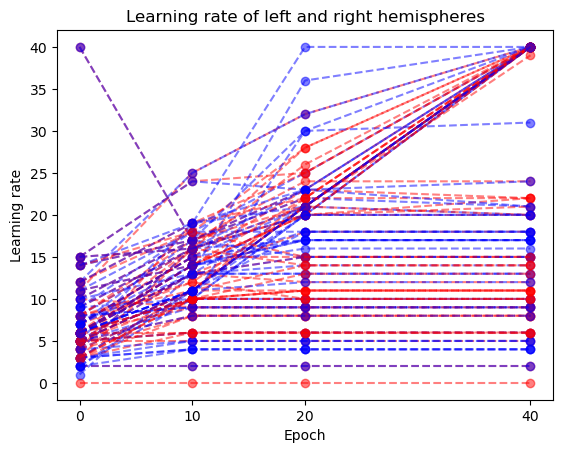

In [ ]:
# look at the epoch to reach 70% accuracy with cross hemi added at diff epochs

for i in range(50):
    plt.plot([0,1,2,4],[epoch_0_lr_left[i], epoch_10_lr_left[i], epoch_20_lr_left[i], epoch_40_lr_left[i]], ls='--', marker='o',color='r',alpha=0.5)
    plt.plot([0,1,2,4],[epoch_0_lr_right[i], epoch_10_lr_right[i], epoch_20_lr_right[i], epoch_40_lr_right[i]], ls='--', marker='o',color='b',alpha=0.5)

plt.xticks([0, 1, 2, 4], ['0', '10', '20', '40'])
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.title('Learning rate of left and right hemispheres')
plt.show()

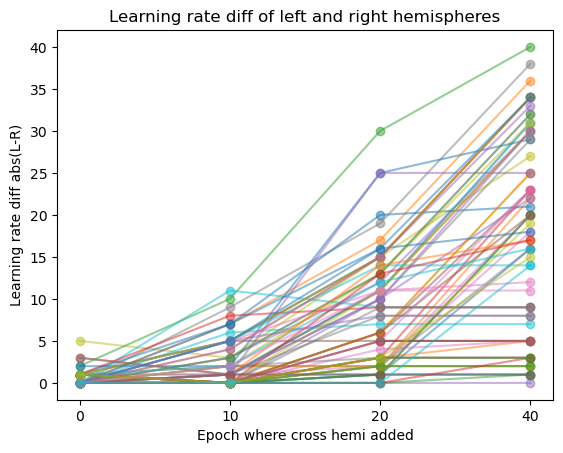

In [103]:
# look at the epoch to reach 70% accuracy with cross hemi added at diff epochs

for i in range(70):

    plt.plot([0,1,2,3],[np.abs(epoch_0_lr_left[i] - epoch_0_lr_right[i]), np.abs(epoch_10_lr_left[i] - epoch_10_lr_right[i]), np.abs(epoch_20_lr_left[i] - epoch_20_lr_right[i]), np.abs(epoch_40_lr_left[i] - epoch_40_lr_right[i])], marker='o', alpha=0.5)

    # plt.plot([0,1,2,4],[epoch_0_lr_left[i], epoch_10_lr_left[i], epoch_20_lr_left[i], epoch_40_lr_left[i]], ls='--', marker='o',color='r',alpha=0.5)
    # plt.plot([0,1,2,4],[epoch_0_lr_right[i], epoch_10_lr_right[i], epoch_20_lr_right[i], epoch_40_lr_right[i]], ls='--', marker='o',color='b',alpha=0.5)

plt.xticks([0, 1, 2, 3], ['0', '10', '20', '40'])
plt.xlabel('Epoch where cross hemi added')
plt.ylabel('Learning rate diff abs(L-R)')
plt.title('Learning rate diff of left and right hemispheres')
plt.show()

In [78]:
# Matching learning rates with addition of cross hemi

epoch_40_lr_left = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_40_lr_right = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

epoch_20_lr_left = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_20_lr_right = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

epoch_0_lr_left = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_0_lr_right = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

epoch_10_lr_left = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_10_lr_right = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

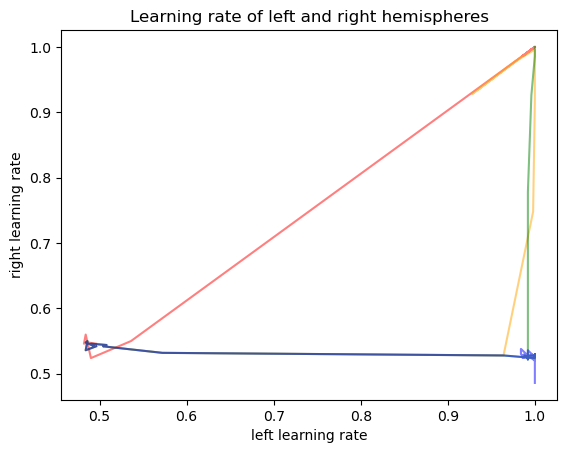

In [94]:
plt.plot(epoch_0_lr_left[i], epoch_0_lr_right[i], color='red', alpha=0.5)
plt.plot(epoch_10_lr_left[i], epoch_10_lr_right[i], color='orange', alpha=0.5)
plt.plot(epoch_20_lr_left[i], epoch_20_lr_right[i], color='green', alpha=0.5)
plt.plot(epoch_40_lr_left[i], epoch_40_lr_right[i], color='blue', alpha=0.5)
plt.xlabel('left learning rate')
plt.ylabel('right learning rate')
plt.title('Learning rate of left and right hemispheres')
plt.show()


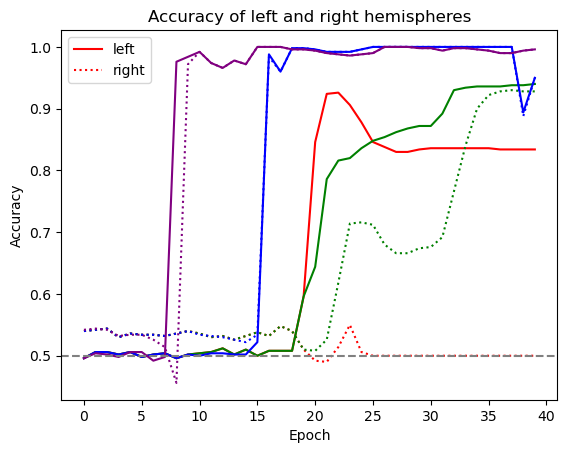

In [96]:
for i in [16]:

    plt.plot(epoch_40_lr_left[i], color='red', alpha=1,label='left')
    plt.plot(epoch_40_lr_right[i], ls=':', color='red', alpha=1,label='right')
    plt.plot(epoch_20_lr_left[i], color='green', alpha=1)
    plt.plot(epoch_20_lr_right[i], ls=':', color='green', alpha=1)
    plt.plot(epoch_10_lr_left[i], color='blue', alpha=1)
    plt.plot(epoch_10_lr_right[i], ls=':', color='blue', alpha=1)
    plt.plot(epoch_0_lr_left[i], color='purple', alpha=1)
    plt.plot(epoch_0_lr_right[i], ls=':', color='purple', alpha=1)


    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of left and right hemispheres')
    plt.axhline(y=0.5, color='grey', linestyle='--')
    plt.legend()
    plt.savefig('figs/lr_learning_rate_plot.pdf')
    plt.show()

# What about the modularity?

In [4]:
path = '/Users/catherinewang/Desktop/RNN/Dual_ALM_RNN/dual_alm_rnn_models/TwoHemiRNNTanh_single_readout/train_type_modular_fixed_input_cross_hemi/n_neurons_4_random_seed_0/unfix_epoch_0/n_epochs_40_n_epochs_across_hemi_0/lr_3.0e-03_bs_75/sigma_input_noise_0.10_sigma_rec_noise_0.10/xs_left_alm_amp_1.00_right_alm_amp_1.00/init_cross_hemi_rel_factor_1.00/{}'

checkpoint_path = path.format('best_model.pth')

In [5]:
exp = DualALMRNNExp()

# Load configs to get model parameters
with open('dual_alm_rnn_configs.json', 'r') as f:
    configs = json.load(f)


exp.configs['train_type'] = "train_type_modular_fixed_input_cross_hemi"
exp.configs['init_cross_hemi_rel_factor'] = 0.2
exp.configs['n_neurons'] = 4
exp.configs['random_seed'] = 0
exp.configs['unfix_epoch'] = 0
exp.configs['switch_epoch_n'] = 0
exp.configs['n_epochs'] = 40

model = getattr(sys.modules[__name__], configs['model_type'])(exp.configs, \
    exp.a, exp.pert_begin, exp.pert_end, noise=True)

state_dict = torch.load(checkpoint_path, map_location='cpu', weights_only=True)
model.load_state_dict(state_dict)
# params = {'batch_size': configs['bs'], 'shuffle': True}
# inputs = data.TensorDataset(torch.tensor(sensory_inputs), torch.tensor(trial_type_labels))
# inputs = data.DataLoader(inputs, **params)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # CW Mac update
model = model.to(device)
model.eval()



Fixed input weights for left and right ALM


TwoHemiRNNTanh_single_readout(
  (rnn_cell): TwoHemiRNNCellGeneral(
    (nonlinearity): Tanh()
    (w_hh_linear_ll): Linear(in_features=2, out_features=2, bias=True)
    (w_hh_linear_rr): Linear(in_features=2, out_features=2, bias=True)
    (w_hh_linear_lr): Linear(in_features=2, out_features=2, bias=False)
    (w_hh_linear_rl): Linear(in_features=2, out_features=2, bias=False)
  )
  (w_xh_linear_left_alm): Linear(in_features=2, out_features=2, bias=False)
  (w_xh_linear_right_alm): Linear(in_features=2, out_features=2, bias=False)
  (readout_linear): Linear(in_features=4, out_features=1, bias=True)
)

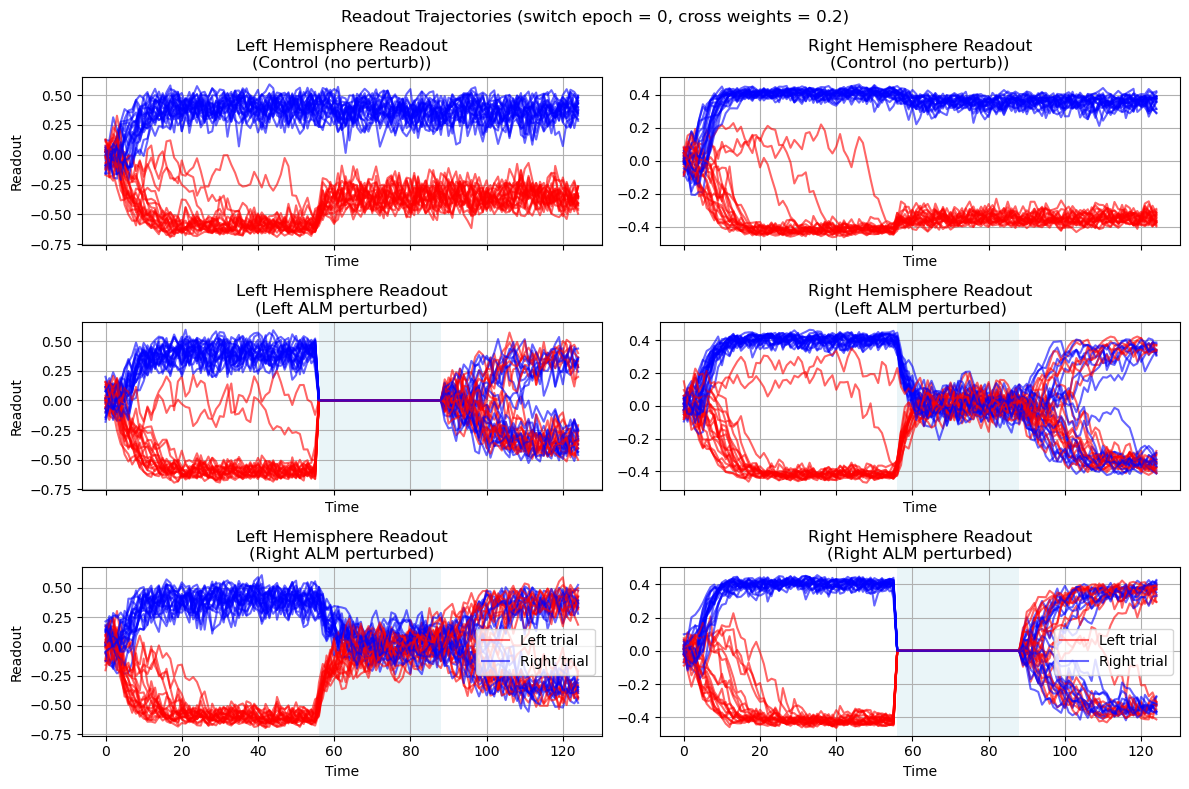

In [116]:
# Plot what happens to individual readouts on control vs perturbation trials
import matplotlib.gridspec as gridspec

# start by loading data
train_save_path = os.path.join(exp.configs['data_dir'], 'train')

train_sensory_inputs = np.load(os.path.join(train_save_path, 'onehot_sensory_inputs_simple.npy' ))
train_trial_type_labels = np.load(os.path.join(train_save_path, 'onehot_trial_type_labels_simple.npy'))
# load train inputs and labels

train_sensory_inputs.shape, train_trial_type_labels.shape

l_trial_idx = np.where(train_trial_type_labels == 0)[0]
r_trial_idx = np.where(train_trial_type_labels == 1)[0]

l_trial_input = train_sensory_inputs[l_trial_idx, :]
r_trial_input = train_sensory_inputs[r_trial_idx, :]

l_trial_input = torch.tensor(l_trial_input).to(device)
r_trial_input = torch.tensor(r_trial_input).to(device)
l_trial_input.shape

sample_begin = exp.sample_begin
delay_begin = exp.delay_begin
l_trial_input_all, r_trial_input_all = l_trial_input, r_trial_input


### After data loading, run model # with no noise:
model.train_type = "train_type_modular_fixed_input_cross_hemi"


# Pass input into model
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)  # 3 conditions, 2 hemispheres

# Define condition names for labeling
condition_names = [
    "Control (no perturb)", 
    "Left ALM perturbed", 
    "Right ALM perturbed"
]
# For legend management
line_objs = [[None, None] for _ in range(3)]

# For each of the three conditions: control, left alm pert, right alm pert
for rowidx, (uni_pert, left_pert) in enumerate([
        (0.0, 0.5),   # Control: no perturb
        (1.0, 1.0),   # Left ALM perturbed
        (1.0, 0.0)    # Right ALM perturbed
    ]):

    # Set model perturbation parameters for condition
    model.uni_pert_trials_prob = uni_pert
    model.left_alm_pert_prob = left_pert
    hs_l, zs_l = model(l_trial_input_all)    # left trial
    hs_r, zs_r = model(r_trial_input_all)    # right trial

    for i in range(20):
        # l_trial_input = l_trial_input_all[i].reshape(1, exp.T, 2)
        # r_trial_input = r_trial_input_all[i].reshape(1, exp.T, 2)

        # Compute left and right readouts for left and right trials
        left_readout_l = hs_l[i, :, :model.n_neurons//2].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, :model.n_neurons//2]
        )
        right_readout_l = hs_l[i, :, model.n_neurons//2:].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, model.n_neurons//2:]
        )

        left_readout_r = hs_r[i, :, :model.n_neurons//2].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, :model.n_neurons//2]
        )
        right_readout_r = hs_r[i, :, model.n_neurons//2:].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, model.n_neurons//2:]
        )

        # Left hemisphere readout subplot (col 0)
        l_line = axs[rowidx,0].plot(left_readout_l.flatten(), color='red', alpha=0.6, label='Left trial' if i==0 else None)
        r_line = axs[rowidx,0].plot(left_readout_r.flatten(), color='blue', alpha=0.6, label='Right trial' if i==0 else None)
        if i == 0: line_objs[rowidx][0] = (l_line[0], r_line[0])

        # Right hemisphere readout subplot (col 1)
        l_line2 = axs[rowidx,1].plot(right_readout_l.flatten(), color='red', alpha=0.6, label='Left trial' if i==0 else None)
        r_line2 = axs[rowidx,1].plot(right_readout_r.flatten(), color='blue', alpha=0.6, label='Right trial' if i==0 else None)
        if i == 0: line_objs[rowidx][1] = (l_line2[0], r_line2[0])

    # Add light blue bar (span) for perturbation period on perturbation subplots
    # Only add for perturbed conditions (rowidx 1 and 2)
    if rowidx in [1, 2]:
        # perturbation likely in delay epoch; use exp.delay_begin, exp.T for x-range
        axs[rowidx,0].axvspan(exp.delay_begin, exp.pert_end, facecolor='lightblue', alpha=0.25, zorder=0)
        axs[rowidx,1].axvspan(exp.delay_begin, exp.pert_end, facecolor='lightblue', alpha=0.25, zorder=0)

    # Titles, labels for each row
    axs[rowidx,0].set_title(f"Left Hemisphere Readout\n({condition_names[rowidx]})" )
    axs[rowidx,1].set_title(f"Right Hemisphere Readout\n({condition_names[rowidx]})")
    axs[rowidx,0].set_ylabel("Readout")
    axs[rowidx,0].set_xlabel("Time")
    axs[rowidx,1].set_xlabel("Time")
    axs[rowidx,0].grid()
    axs[rowidx,1].grid()

# Only show legend in the bottom row for both hemispheres (col 0/col 1)
for col in range(2):
    axs[-1,col].legend()

plt.suptitle(f'Readout Trajectories (switch epoch = {exp.configs["switch_epoch_n"]}, cross weights = {exp.configs["init_cross_hemi_rel_factor"]})')
plt.tight_layout()
plt.show()




# Large RNN small cross-hemi weights?

How large is the dip?


In [8]:
exp = DualALMRNNExp()

# Load configs to get model parameters
with open('dual_alm_rnn_configs.json', 'r') as f:
    configs = json.load(f)


exp.configs['train_type'] = "train_type_modular_fixed_input_cross_hemi"
exp.configs['init_cross_hemi_rel_factor'] = 0.2
exp.configs['random_seed'] = 1
exp.configs['switch_epoch_n'] = 0
exp.configs['one_hot'] = 1
exp.configs['n_epochs'] = 40

model = getattr(sys.modules[__name__], exp.configs['model_type'])(exp.configs, \
    exp.a, exp.pert_begin, exp.pert_end, noise=True)
# model = TwoHemiRNNTanh_single_readout(configs, exp.a, exp.pert_begin, exp.pert_end)
exp.init_sub_path(exp.configs['train_type'])

checkpoint_file = 'last_model.pth'
# checkpoint_file = 'model_epoch_15.pth'
checkpoint_path = os.path.join(exp.configs['models_dir'], exp.configs['model_type'], exp.sub_path, checkpoint_file)
if not os.path.exists(checkpoint_path):
    raise FileNotFoundError(f"Model checkpoint not found at {checkpoint_path}")
print(checkpoint_path)
state_dict = torch.load(checkpoint_path, map_location='cpu', weights_only=True)
model.load_state_dict(state_dict)
# params = {'batch_size': configs['bs'], 'shuffle': True}
# inputs = data.TensorDataset(torch.tensor(sensory_inputs), torch.tensor(trial_type_labels))
# inputs = data.DataLoader(inputs, **params)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # CW Mac update
model = model.to(device)
model.eval()
# Draw the readout trajectory
bias = model.readout_linear.bias.data.cpu().numpy()[0]
readout_weights = model.readout_linear.weight.data.cpu().numpy()
recurrent_weights = model.rnn_cell.w_hh_linear_ll.weight.data.cpu().numpy()
input_weights = model.w_xh_linear_left_alm.weight.data.cpu().numpy()
recurrent_bias = model.rnn_cell.w_hh_linear_ll.bias.data.cpu().numpy()

# print(input_weights)
# plt.plot(model.rnn_cell.w_hh_linear_lr.weight.data.cpu().numpy())
# plt.plot(model.rnn_cell.w_hh_linear_rl.weight.data.cpu().numpy())
# plt.plot(model.rnn_cell.w_hh_linear_rr.weight.data.cpu().numpy())
# plt.plot(model.rnn_cell.w_hh_linear_ll.weight.data.cpu().numpy())
print(np.sum(np.abs(model.rnn_cell.w_hh_linear_rr.weight.data.cpu().numpy())), np.sum(np.abs(model.rnn_cell.w_hh_linear_ll.weight.data.cpu().numpy())))
model.rnn_cell.w_hh_linear_rl.weight.data.cpu().numpy()

Fixed input weights for left and right ALM
dual_alm_rnn_models/TwoHemiRNNTanh_single_readout/train_type_modular_fixed_input_cross_hemi/n_neurons_256_random_seed_1/unfix_epoch_0/n_epochs_40_n_epochs_across_hemi_0/lr_1.0e-04_bs_256/sigma_input_noise_0.10_sigma_rec_noise_0.10/xs_left_alm_amp_1.00_right_alm_amp_1.00/init_cross_hemi_rel_factor_0.20/last_model.pth
822.2494 819.23645


array([[-1.3835171e-02, -8.8256486e-03,  3.3573455e-03, ...,
         7.9787811e-03,  5.3229965e-03,  9.1161318e-03],
       [ 6.2373718e-03, -7.6643773e-05,  1.5343544e-02, ...,
         2.8832445e-03,  9.6692834e-03,  4.5821900e-03],
       [ 1.8272260e-02,  1.2273358e-02,  6.3055558e-03, ...,
         1.3554470e-02,  1.4207014e-02,  3.1298879e-03],
       ...,
       [ 6.8035540e-03, -1.6683389e-02, -1.8078694e-02, ...,
        -1.9806746e-02,  3.3481490e-05,  9.5411129e-03],
       [-1.5494874e-02,  1.0952087e-03, -2.6705205e-02, ...,
        -2.0213794e-02,  1.6328960e-03,  1.4573139e-02],
       [-1.1155932e-02,  1.7323388e-02, -1.1945099e-03, ...,
         1.6413861e-03, -1.3554386e-02, -1.9357834e-02]], dtype=float32)

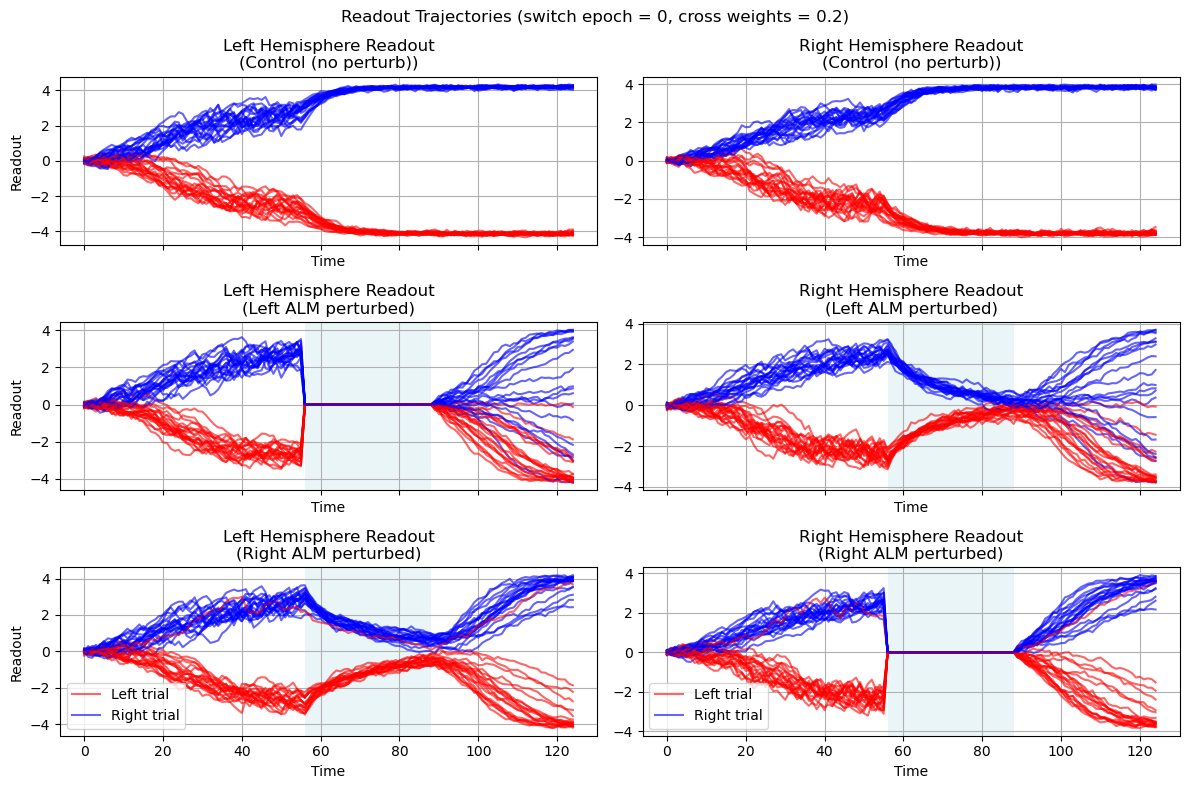

In [9]:
# Plot what happens to individual readouts on control vs perturbation trials
import matplotlib.gridspec as gridspec

# start by loading data
train_save_path = os.path.join(exp.configs['data_dir'], 'train')

train_sensory_inputs = np.load(os.path.join(train_save_path, 'onehot_sensory_inputs_same_noise.npy' ))
train_sensory_inputs = np.load(os.path.join(train_save_path, 'onehot_sensory_inputs.npy' ))
train_trial_type_labels = np.load(os.path.join(train_save_path, 'onehot_trial_type_labels.npy'))
# load train inputs and labels

train_sensory_inputs.shape, train_trial_type_labels.shape

l_trial_idx = np.where(train_trial_type_labels == 0)[0]
r_trial_idx = np.where(train_trial_type_labels == 1)[0]

l_trial_input = train_sensory_inputs[l_trial_idx, :]
r_trial_input = train_sensory_inputs[r_trial_idx, :]

l_trial_input = torch.tensor(l_trial_input).to(device)
r_trial_input = torch.tensor(r_trial_input).to(device)
l_trial_input.shape

sample_begin = exp.sample_begin
delay_begin = exp.delay_begin
l_trial_input_all, r_trial_input_all = l_trial_input, r_trial_input


### After data loading, run model # with no noise:
model.train_type = "train_type_modular_fixed_input_cross_hemi"
model.return_input = True


# Pass input into model
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)  # 3 conditions, 2 hemispheres

# Define condition names for labeling
condition_names = [
    "Control (no perturb)", 
    "Left ALM perturbed", 
    "Right ALM perturbed"
]
# For legend management
line_objs = [[None, None] for _ in range(3)]

# For each of the three conditions: control, left alm pert, right alm pert
for rowidx, (uni_pert, left_pert) in enumerate([
        (0.0, 0.5),   # Control: no perturb
        (1.0, 1.0),   # Left ALM perturbed
        (1.0, 0.0)    # Right ALM perturbed
    ]):

    # Set model perturbation parameters for condition
    model.uni_pert_trials_prob = uni_pert
    model.left_alm_pert_prob = left_pert
    _, hs_l, zs_l = model(l_trial_input_all)    # left trial
    _, hs_r, zs_r = model(r_trial_input_all)    # right trial

    for i in range(20):
        # l_trial_input = l_trial_input_all[i].reshape(1, exp.T, 2)
        # r_trial_input = r_trial_input_all[i].reshape(1, exp.T, 2)

        # Compute left and right readouts for left and right trials
        left_readout_l = hs_l[i, :, :model.n_neurons//2].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, :model.n_neurons//2]
        )
        right_readout_l = hs_l[i, :, model.n_neurons//2:].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, model.n_neurons//2:]
        )

        left_readout_r = hs_r[i, :, :model.n_neurons//2].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, :model.n_neurons//2]
        )
        right_readout_r = hs_r[i, :, model.n_neurons//2:].detach().cpu().numpy().dot(
            model.readout_linear.weight.data.cpu().numpy()[0, model.n_neurons//2:]
        )

        # Left hemisphere readout subplot (col 0)
        l_line = axs[rowidx,0].plot(left_readout_l.flatten(), color='red', alpha=0.6, label='Left trial' if i==0 else None)
        r_line = axs[rowidx,0].plot(left_readout_r.flatten(), color='blue', alpha=0.6, label='Right trial' if i==0 else None)
        if i == 0: line_objs[rowidx][0] = (l_line[0], r_line[0])

        # Right hemisphere readout subplot (col 1)
        l_line2 = axs[rowidx,1].plot(right_readout_l.flatten(), color='red', alpha=0.6, label='Left trial' if i==0 else None)
        r_line2 = axs[rowidx,1].plot(right_readout_r.flatten(), color='blue', alpha=0.6, label='Right trial' if i==0 else None)
        if i == 0: line_objs[rowidx][1] = (l_line2[0], r_line2[0])

    # Add light blue bar (span) for perturbation period on perturbation subplots
    # Only add for perturbed conditions (rowidx 1 and 2)
    if rowidx in [1, 2]:
        # perturbation likely in delay epoch; use exp.delay_begin, exp.T for x-range
        axs[rowidx,0].axvspan(exp.delay_begin, exp.pert_end, facecolor='lightblue', alpha=0.25, zorder=0)
        axs[rowidx,1].axvspan(exp.delay_begin, exp.pert_end, facecolor='lightblue', alpha=0.25, zorder=0)

    # Titles, labels for each row
    axs[rowidx,0].set_title(f"Left Hemisphere Readout\n({condition_names[rowidx]})" )
    axs[rowidx,1].set_title(f"Right Hemisphere Readout\n({condition_names[rowidx]})")
    axs[rowidx,0].set_ylabel("Readout")
    axs[rowidx,0].set_xlabel("Time")
    axs[rowidx,1].set_xlabel("Time")
    axs[rowidx,0].grid()
    axs[rowidx,1].grid()

# Only show legend in the bottom row for both hemispheres (col 0/col 1)
for col in range(2):
    axs[-1,col].legend()

plt.suptitle(f'Readout Trajectories (switch epoch = {exp.configs["switch_epoch_n"]}, cross weights = {exp.configs["init_cross_hemi_rel_factor"]})')
plt.tight_layout()
plt.show()




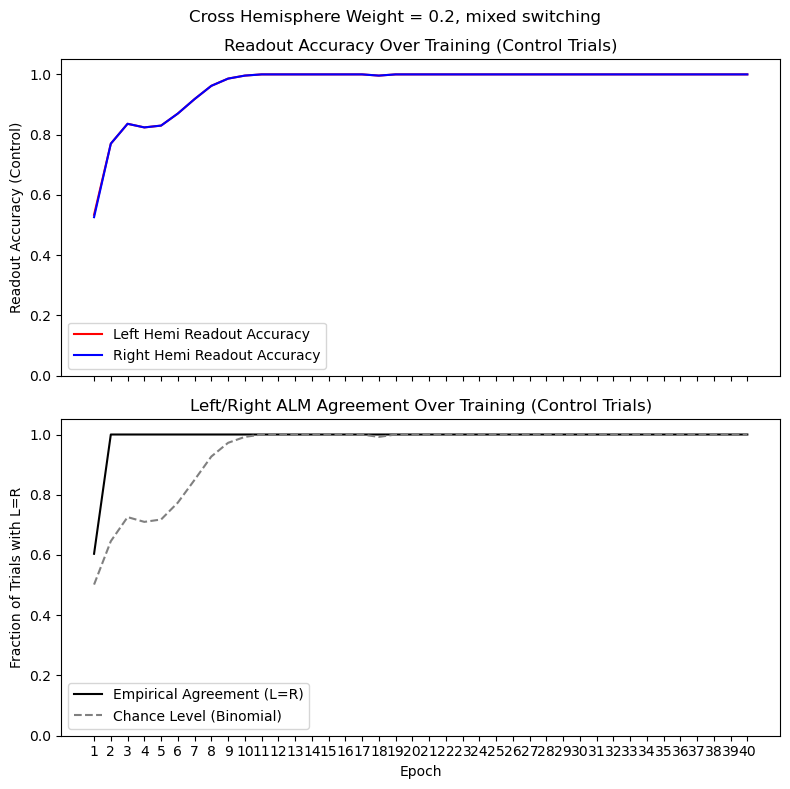

In [10]:

checkpoint_file = 'all_val_results_dict.npy'
checkpoint_path = os.path.join(exp.configs['logs_dir'], exp.configs['model_type'], exp.sub_path, checkpoint_file)

results_dict = np.load(checkpoint_path, allow_pickle=True)

epochs = np.arange(1, len(results_dict) + 1)
readout_acc_left = np.array([results_dict[i]['control']['readout_accuracy_left'] for i in range(len(results_dict))])
readout_acc_right = np.array([results_dict[i]['control']['readout_accuracy_right'] for i in range(len(results_dict))])

# time_to_reach.append(np.where(readout_acc_left > 0.9)[0][0])
# time_to_reach_right.append(np.where(readout_acc_right > 0.9)[0][0])


n_trials_agreed = np.array([results_dict[i]['control']['n_trials_agreed'] for i in range(len(results_dict))])
n_trials = np.array([results_dict[i]['control']['n_trials'] for i in range(len(results_dict))])
agreement_frac = n_trials_agreed / n_trials

# Compute chance level: p(agree) = p_L^2 + (1-p_L)^2 if p_L = p_R, but here use both
chance_agree = readout_acc_left * readout_acc_right + (1 - readout_acc_left) * (1 - readout_acc_right)

corruption_start_epoch = exp.configs['corruption_start_epoch']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Top subplot: Readout accuracies
ax1.plot(epochs, readout_acc_left, color='r', label='Left Hemi Readout Accuracy')
ax1.plot(epochs, readout_acc_right, color='b', label='Right Hemi Readout Accuracy')
if exp.configs['train_type'] == 'train_type_modular_corruption':
    ax1.axvline(corruption_start_epoch, color='r', linestyle=':', linewidth=2, label='Corruption Start (Epoch {})'.format(corruption_start_epoch))
ax1.set_ylabel('Readout Accuracy (Control)')
ax1.set_title('Readout Accuracy Over Training (Control Trials)')
ax1.set_xticks(epochs)
ax1.set_ylim(0, 1.05)
ax1.legend() 

# Bottom subplot: Agreement
ax2.plot(epochs, agreement_frac, color='k', label='Empirical Agreement (L=R)')
ax2.plot(epochs, chance_agree, color='gray', linestyle='--', label='Chance Level (Binomial)')
if exp.configs['train_type'] == 'train_type_modular_corruption':
    ax2.axvline(corruption_start_epoch, color='r', linestyle=':', linewidth=2, label='Corruption Start (Epoch {})'.format(corruption_start_epoch))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Fraction of Trials with L=R')
ax2.set_title('Left/Right ALM Agreement Over Training (Control Trials)')
ax2.set_xticks(epochs)
ax2.set_ylim(0, 1.05)
ax2.legend()
# plt.xlim(0,20)

plt.suptitle(f'Cross Hemisphere Weight = {exp.configs["init_cross_hemi_rel_factor"]}, mixed switching')

plt.tight_layout()